## Goal: Given a list of numbers, I find the digit distribution of each number
## Motivation: I want to compare the similarity of an abritrary list of elements by their "digital signatures", which is characterized by numbers. 
## Example: 2900 and 9020 have are digital anagrams because they the same count of digits, whereas 299 and 29 are not anagrams because they don't have the same number of each of their base digits.
### Details: By graphing the distrubution of digits for each number, we can see the unique distributions. Furthermore, if I know the distribution of each number, I can filter them out for further comparison.

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline  

In [1]:
nums = [113, 4129, 131, 311, 1121845, 129331, 2148151, 1112933, 45642, 25446]

anagrams = {} # use count of digital signatures
base = {el: 0 for el in '0123456789'} # use to count digits

df_dict = {}
df_dict['dist_arr'] = []
df_dict['num'] = []

for num in nums:
    print(num)
    dist_dict = base.copy() # digit count 
    dist_arr = [0]*10
    
    for digit in str(num):
        dist_dict[digit] += 1
        dist_arr[int(digit)] += 1
        
    print(dist_dict)
    print(dist_arr)

    hist = "".join([str(v) for k,v in dist_dict.items()])
    print(hist)
    if hist in anagrams:
        anagrams[hist] += 1
    else:
        anagrams[hist] = 1
    
    # form data for a dataframe later
    df_dict['num'].append(num)
    df_dict['dist_arr'].append(dist_arr)

    
print(anagrams)
print()
print(df_dict)

113
{'0': 0, '1': 2, '2': 0, '3': 1, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
[0, 2, 0, 1, 0, 0, 0, 0, 0, 0]
0201000000
4129
{'0': 0, '1': 1, '2': 1, '3': 0, '4': 1, '5': 0, '6': 0, '7': 0, '8': 0, '9': 1}
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
0110100001
131
{'0': 0, '1': 2, '2': 0, '3': 1, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
[0, 2, 0, 1, 0, 0, 0, 0, 0, 0]
0201000000
311
{'0': 0, '1': 2, '2': 0, '3': 1, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0}
[0, 2, 0, 1, 0, 0, 0, 0, 0, 0]
0201000000
1121845
{'0': 0, '1': 3, '2': 1, '3': 0, '4': 1, '5': 1, '6': 0, '7': 0, '8': 1, '9': 0}
[0, 3, 1, 0, 1, 1, 0, 0, 1, 0]
0310110010
129331
{'0': 0, '1': 2, '2': 1, '3': 2, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 1}
[0, 2, 1, 2, 0, 0, 0, 0, 0, 1]
0212000001
2148151
{'0': 0, '1': 3, '2': 1, '3': 0, '4': 1, '5': 1, '6': 0, '7': 0, '8': 1, '9': 0}
[0, 3, 1, 0, 1, 1, 0, 0, 1, 0]
0310110010
1112933
{'0': 0, '1': 3, '2': 1, '3': 2, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 1}
[0, 3, 1, 

In [3]:
df = pd.DataFrame(df_dict)
df[['0','1','2','3','4','5','6','7','8','9']] = pd.DataFrame(df['dist_arr'].tolist(), index=df.index)
df

,dist_arr,num,0,1,2,3,4,5,6,7,8,9
0,"[0, 2, 0, 1, 0, 0, 0, 0, 0, 0]",113,0,2,0,1,0,0,0,0,0,0
1,"[0, 1, 1, 0, 1, 0, 0, 0, 0, 1]",4129,0,1,1,0,1,0,0,0,0,1
2,"[0, 2, 0, 1, 0, 0, 0, 0, 0, 0]",131,0,2,0,1,0,0,0,0,0,0
3,"[0, 2, 0, 1, 0, 0, 0, 0, 0, 0]",311,0,2,0,1,0,0,0,0,0,0
4,"[0, 3, 1, 0, 1, 1, 0, 0, 1, 0]",1121845,0,3,1,0,1,1,0,0,1,0
5,"[0, 2, 1, 2, 0, 0, 0, 0, 0, 1]",129331,0,2,1,2,0,0,0,0,0,1
6,"[0, 3, 1, 0, 1, 1, 0, 0, 1, 0]",2148151,0,3,1,0,1,1,0,0,1,0
7,"[0, 3, 1, 2, 0, 0, 0, 0, 0, 1]",1112933,0,3,1,2,0,0,0,0,0,1
8,"[0, 0, 1, 0, 2, 1, 1, 0, 0, 0]",45642,0,0,1,0,2,1,1,0,0,0
9,"[0, 0, 1, 0, 2, 1, 1, 0, 0, 0]",25446,0,0,1,0,2,1,1,0,0,0


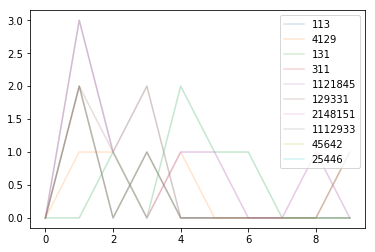

In [4]:
df.loc[[0]]
plt.cla()
for i,el in df.iterrows():
    plt.plot(el['dist_arr'], alpha=0.2, label=el['num'])
    
plt.legend(loc='upper right')
plt.show()